In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Tải dữ liệu
gold = yf.download('GC=F', '2022-03-01', '2024-03-01', auto_adjust=True)
print(gold)


[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close  Volume
Date                                                                  
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516
...                 ...          ...          ...          ...     ...
2024-02-23  2026.000000  2038.599976  2014.900024  2038.599976      22
2024-02-26  2034.099976  2035.400024  2024.800049  2028.500000     143
2024-02-27  2035.900024  2035.900024  2034.000000  2034.000000     964
2024-02-28  2029.500000  2037.000000  2024.800049  2033.000000     581
2024-02-29  2034.300049  2049.800049  2034.300049  2045.699951     706

[504 ro

In [2]:

# gold.isna()

# # In ra DataFrame để kiểm tra kết quả
# print(gold)

In [3]:

gold['Timestamp'] = gold.index.map(pd.Timestamp.timestamp)
# gold.set_index('Date')
print(gold)


                   Open         High          Low        Close  Volume  \
Date                                                                     
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547   
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109   
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122   
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47   
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516   
...                 ...          ...          ...          ...     ...   
2024-02-23  2026.000000  2038.599976  2014.900024  2038.599976      22   
2024-02-26  2034.099976  2035.400024  2024.800049  2028.500000     143   
2024-02-27  2035.900024  2035.900024  2034.000000  2034.000000     964   
2024-02-28  2029.500000  2037.000000  2024.800049  2033.000000     581   
2024-02-29  2034.300049  2049.800049  2034.300049  2045.699951     706   

               Timestamp  
Date      

In [4]:
# Thay thế các giá trị NaN bằng 0
gold.fillna(0, inplace=True)

# In ra DataFrame để kiểm tra kết quả
print(gold)

                   Open         High          Low        Close  Volume  \
Date                                                                     
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547   
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109   
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122   
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47   
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516   
...                 ...          ...          ...          ...     ...   
2024-02-23  2026.000000  2038.599976  2014.900024  2038.599976      22   
2024-02-26  2034.099976  2035.400024  2024.800049  2028.500000     143   
2024-02-27  2035.900024  2035.900024  2034.000000  2034.000000     964   
2024-02-28  2029.500000  2037.000000  2024.800049  2033.000000     581   
2024-02-29  2034.300049  2049.800049  2034.300049  2045.699951     706   

               Timestamp  
Date      

In [5]:
ts_gold = gold['Close'].asfreq('D')

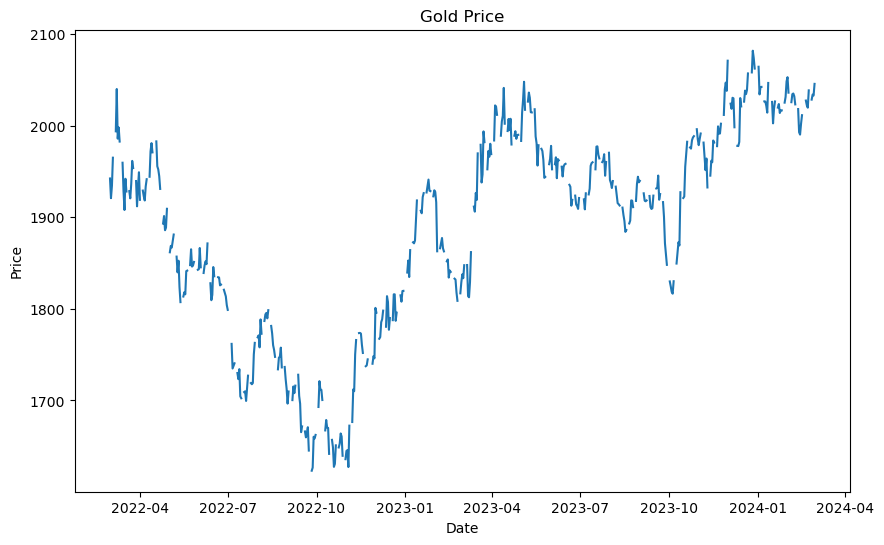

In [6]:
# Phân tích chuỗi thời gian
# Vẽ biểu đồ chuỗi thời gian
plt.figure(figsize=(10, 6))
plt.plot(ts_gold)
plt.title('Gold Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [7]:
# Mô hình ARIMA
model = ARIMA(ts_gold, order=(5,1,0))  # Đây là một ví dụ với p=5, d=1, q=0
results = model.fit()

In [8]:
# In thông tin về mô hình
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  731
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2137.806
Date:                Sat, 20 Apr 2024   AIC                           4287.612
Time:                        16:50:44   BIC                           4315.170
Sample:                    03-01-2022   HQIC                          4298.244
                         - 02-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1974      0.053     -3.718      0.000      -0.302      -0.093
ar.L2         -0.0628      0.055     -1.145      0.252      -0.170       0.045
ar.L3          0.0434      0.062      0.701      0.4

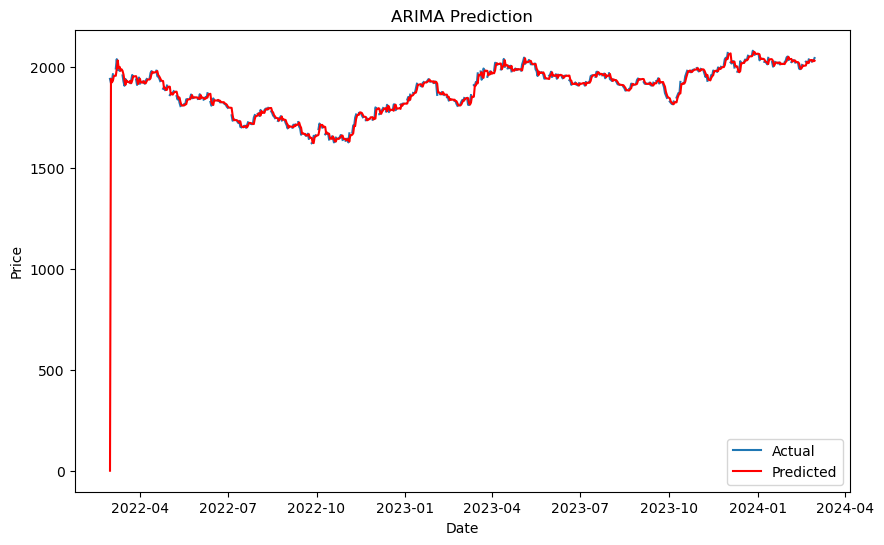

In [9]:
# Vẽ biểu đồ dự đoán
plt.figure(figsize=(10, 6))
plt.plot(ts_gold, label='Actual')
plt.plot(results.fittedvalues, color='red', label='Predicted')
plt.title('ARIMA Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()